# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Learning Objective

At the end of this experiment, you will be able to:

* perform Data preprocessing

In [ ]:
#@title Mini Hackathon Walkthrough
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/aiml_batch_15/preview_videos/Mini_Hackathon_Data_Munging_Briefing.mp4" type="video/mp4">
</video>
""")

## Problem Statement

We will be using district wise demographics, enrollments, and teacher indicator data to predict whether the literacy rate is high/ medium/ low in each district.

### Data Preprocessing

Data preprocessing is an important step in solving every machine learning problem. Most of
the datasets used with Machine Learning problems need to be processed / cleaned / transformed
so that a Machine Learning algorithm can be trained on it.

There are different steps involved in Data Preprocessing. These steps are as follows:

    1. Data Cleaning → In this step the primary focus is on
        - Handling missing data
        - Handling noisy data
        - Detection and removal of outliers
    
    2. Data Integration → This process is used when data is gathered from various data sources
    and data are combined to form consistent data. This data after performing cleaning is used
    for analysis.
    
    3. Data Transformation → In this step we will convert the raw data into a specified format according to the need of the model we are building. There are many options used for
    transforming the data as below:
        - Normalization
        - Aggregation
        - Generalization
        
    4. Data Reduction → Following data transformation and scaling, the redundancy within the data is removed and is organized efficiently.



### Total Marks  = 20

In [2]:
# @title Download the datasets
from IPython import get_ipython

ipython = get_ipython()
  
notebook="U1_MH1_Data_Munging" #name of the notebook

def setup():
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/B15_Data_Munging.zip")
    ipython.magic("sx unzip B15_Data_Munging.zip")
    print("Data downloaded successfully")
    return

setup()

Data downloaded successfully


In [2]:
!ls

B15_Data_Munging.zip
Districtwise_Basicdata.csv
Districtwise_Enrollment_details_indicator.csv
Districtwise_Teacher_indicator.csv
sample_data


## Exercise 1 - Load and Explore the Data (2 Marks)
1. We have three different files

  * Districtwise_Basicdata.csv
  * Districtwise_Enrollment_details_indicator.csv
  * Districtwise_Teacher_indicator.csv

  These files contain the necessary data to solve the problem. <br>

2. Load the files based on **team allocation** mentioned below. Observe the header level details, data records while loading the data.
  
  Hint : Use read_csv from pandas with [skiprows or header](https://towardsdatascience.com/import-csv-files-as-pandas-dataframe-with-skiprows-skipfooter-usecols-index-col-and-header-fbf67a2f92a) options.

3. Read the columns of the dataset and rename if required.

  Hint : Rename column names (if any) using the following [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

Team allocation for dataset selection

    Team A = 1,3,5,7,9,11,13,15 
        Districtwise_Basicdata.csv
        Districtwise_Enrollment_details_indicator.csv

    Team B = 2,4,6,8,10,12,14,16
        Districtwise_Basicdata.csv
        Districtwise_Teacher_indicator.csv

In [33]:
# Importing all the required packages and add neccesary imports if required
import pandas as pd
import numpy as np
from sklearn import preprocessing                     # Converting categorical data to numerical
from sklearn.preprocessing import StandardScaler      # Mean Correction and standard scaling

1. Accessing Data set


In [34]:
# Loading in Csv files into Dataframe
basic_data = pd.read_csv('Districtwise_Basicdata.csv', skiprows=1)
enroll_data = pd.read_csv('Districtwise_Enrollment_details_indicator.csv', skiprows=3)
basic_data.shape, enroll_data.shape

((1324, 19), (1324, 166))

2. Dataset Exploration

In [35]:
basic_data.columns

Index(['Year', 'Statecd', 'statename', 'distcd', 'distname', 'blocks',
       'clusters', 'villages', 'totschools', 'totpopulation', 'p_06_pop',
       'p_urb_pop', 'sexratio', 'sexratio_06', 'growthrate', 'p_sc_pop',
       'p_st_pop', 'overall_lit', 'female_lit'],
      dtype='object')

In [36]:
enroll_data.columns

Index(['Year', 'Statecd', 'State Name ', 'distcd', 'distname', 'Enr Govt1',
       'Enr Govt2', 'Enr Govt3', 'Enr Govt4', 'Enr Govt5',
       ...
       'Rep C7', 'Rep C8', 'Muslim P', 'Muslim Up', 'Muslim G P',
       'Muslim G Up', 'Obc P', 'Obc Up', 'Obc G P', 'Obc G Up'],
      dtype='object', length=166)

In [37]:
# Cheching the column name and number of columns
columns_base = basic_data.columns
columns_enroll = enroll_data.columns
print('Number of Columns in the data set from Basic data', len(columns_base.to_list()))
print('Number of Columns in the data set from DistrictWise Enrollment data', len(columns_enroll.to_list()))
print('Shape of the data sets Base %s and enrollment %s'%(basic_data.shape, enroll_data.shape))

Number of Columns in the data set from Basic data 19
Number of Columns in the data set from DistrictWise Enrollment data 166
Shape of the data sets Base (1324, 19) and enrollment (1324, 166)


In [38]:
print('How many null values present in the Basic Data Set: ', basic_data.isna().any().count())
print('How many null values present in the Enrollment Data Set: ', basic_data.isna().any().count())

How many null values present in the Basic Data Set:  19
How many null values present in the Enrollment Data Set:  19


In [39]:
print('Additional Information about basic data:    ')
basic_data.info()

Additional Information about basic data:    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1324 non-null   object 
 1   Statecd        1324 non-null   int64  
 2   statename      1324 non-null   object 
 3   distcd         1324 non-null   int64  
 4   distname       1324 non-null   object 
 5   blocks         1324 non-null   int64  
 6   clusters       1324 non-null   int64  
 7   villages       1324 non-null   int64  
 8   totschools     1324 non-null   int64  
 9   totpopulation  1268 non-null   float64
 10  p_06_pop       1266 non-null   float64
 11  p_urb_pop      1262 non-null   float64
 12  sexratio       1268 non-null   float64
 13  sexratio_06    1266 non-null   float64
 14  growthrate     1268 non-null   float64
 15  p_sc_pop       1256 non-null   float64
 16  p_st_pop       1256 non-null   float64
 17  overall

In [40]:
basic_data.describe()

,Statecd,distcd,blocks,clusters,villages,totschools,totpopulation,p_06_pop,p_urb_pop,sexratio,sexratio_06,growthrate,p_sc_pop,p_st_pop,female_lit
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.268000e+03,1.266000e+03,1262.000000,1268.000000,1266.000000,1268.000000,1256.000000,1256.000000,1268.000000
mean,17.108761,1727.391239,10.916918,126.652568,899.135952,2175.542296,1.899024e+06,2.511907e+05,24.819255,942.678233,918.813586,17.627886,14.830016,17.625032,64.619353
std,9.341604,933.187369,9.661577,100.247178,627.269611,1434.679991,1.546865e+06,1.999103e+05,19.086172,62.391138,44.169347,11.341541,9.107577,26.942013,12.497905
min,1.000000,101.000000,1.000000,1.000000,6.000000,31.000000,7.948000e+03,1.103980e+03,-25.350000,533.000000,774.000000,-58.390000,0.000000,0.000000,30.970000
25%,9.000000,933.000000,5.000000,58.750000,394.750000,1101.000000,8.222390e+05,1.092651e+05,11.372500,904.000000,891.000000,12.050000,7.487500,0.360000,55.900000
50%,18.000000,1822.500000,8.000000,103.000000,821.500000,1999.500000,1.564392e+06,2.049341e+05,19.500000,946.000000,926.000000,17.055000,15.710000,4.165000,63.740000
75%,24.000000,2410.000000,13.000000,167.000000,1232.000000,2948.250000,2.588039e+06,3.403791e+05,32.430000,981.000000,954.000000,22.740000,20.800000,21.430000,73.570000
max,35.000000,3503.000000,66.000000,680.000000,3987.000000,9581.000000,1.105413e+07,1.256855e+06,100.000000,1176.000000,1029.000000,111.010000,50.170000,98.580000,98.280000


In [41]:
# enroll_data.dtypes.to_dict()
enroll_data[enroll_data.columns[0:100]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 100 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1324 non-null   object 
 1   Statecd       1324 non-null   int64  
 2   State Name    1324 non-null   object 
 3   distcd        1324 non-null   int64  
 4   distname      1324 non-null   object 
 5   Enr Govt1     1324 non-null   int64  
 6   Enr Govt2     1322 non-null   float64
 7   Enr Govt3     1324 non-null   int64  
 8   Enr Govt4     1322 non-null   float64
 9   Enr Govt5     1324 non-null   int64  
 10  Enr Govt6     1319 non-null   float64
 11  Enr Govt7     1324 non-null   int64  
 12  Enr Govt9     1321 non-null   float64
 13  Enr Pvt1      1322 non-null   float64
 14  Enr Pvt2      1322 non-null   float64
 15  Enr Pvt3      1321 non-null   float64
 16  Enr Pvt4      1324 non-null   int64  
 17  Enr Pvt5      1323 non-null   float64
 18  Enr Pvt6      1323 non-null

In [42]:
enroll_data[enroll_data.columns[100:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pc Girls4     1324 non-null   int64  
 1   Pc Girls5     1324 non-null   int64  
 2   Pc Girls      1324 non-null   int64  
 3   Enr G C1      1324 non-null   int64  
 4   Enr G C2      1324 non-null   int64  
 5   Enr G C3      1324 non-null   int64  
 6   Enr G C4      1324 non-null   int64  
 7   Enr G C5      1324 non-null   int64  
 8   Enr G C6      1324 non-null   int64  
 9   Enr G C7      1324 non-null   int64  
 10  Enr G C8      1324 non-null   int64  
 11  Enr Dis B C1  1324 non-null   int64  
 12  Enr Dis B C2  1324 non-null   int64  
 13  Enr Dis B C3  1324 non-null   int64  
 14  Enr Dis B C4  1324 non-null   int64  
 15  Enr Dis B C5  1324 non-null   int64  
 16  Enr Dis B C6  1324 non-null   int64  
 17  Enr Dis B C7  1324 non-null   int64  
 18  Enr Dis B C8  1324 non-null 

## Exercise 2  - Data Integration (3 Marks)

As the required data is present in different datasets, we need to **integrate both to make a single dataframe/dataset**.
  * For integrating the datasets, create a unique identifier for each row in both the dataframes so that it can be used to map the data in different files.
   
    * Combine year, state code, district code columns and form a new unique identifier column, refer this [link](https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas).
    * Set the identifier column as the index for each dataframe.

    * Integrate the dataframes using the above index
     
     Hint: For merging or joining the datasets, refer to this [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

**Example:** Data of the district Anantapur in Andrapradesh, which is present in different files should form a single row after integrating the datasets


In [43]:
# Combine year, state code, district code columns and form a new unique identifier column for Basic Data
basic_data['combined'] = basic_data['Year'].astype(str) + "_" + basic_data['Statecd'].astype(str) + "_" + basic_data['distcd'].astype(str)
print("combined columns: ",basic_data.columns)

# basic_data['combined'] = basic_data[basic_data['Year','Statecd','distcd']].apply(
#     lambda x: ','.join(x.dropna().astype(str)),
#     axis=1
# )
# Setting Index as Combined Column
basic_data.set_index('combined', inplace=True)
print('after changing the index columns are: ',basic_data.columns)

combined columns:  Index(['Year', 'Statecd', 'statename', 'distcd', 'distname', 'blocks',
       'clusters', 'villages', 'totschools', 'totpopulation', 'p_06_pop',
       'p_urb_pop', 'sexratio', 'sexratio_06', 'growthrate', 'p_sc_pop',
       'p_st_pop', 'overall_lit', 'female_lit', 'combined'],
      dtype='object')
after changing the index columns are:  Index(['Year', 'Statecd', 'statename', 'distcd', 'distname', 'blocks',
       'clusters', 'villages', 'totschools', 'totpopulation', 'p_06_pop',
       'p_urb_pop', 'sexratio', 'sexratio_06', 'growthrate', 'p_sc_pop',
       'p_st_pop', 'overall_lit', 'female_lit'],
      dtype='object')


In [44]:
# Combine year, state code, district code columns and form a new unique identifier column for 
# istrictwise Enrollment Data
enroll_data['combined'] = enroll_data['Year'].astype(str) + "_" + enroll_data['Statecd'].astype(str) + "_" + enroll_data['distcd'].astype(str)
print("combined columns: ",enroll_data.columns)
# Setting Index as Combined Column
enroll_data.set_index('combined', inplace=True)
print('after changing the index columns are: ',enroll_data.columns)

combined columns:  Index(['Year', 'Statecd', 'State Name ', 'distcd', 'distname', 'Enr Govt1',
       'Enr Govt2', 'Enr Govt3', 'Enr Govt4', 'Enr Govt5',
       ...
       'Rep C8', 'Muslim P', 'Muslim Up', 'Muslim G P', 'Muslim G Up', 'Obc P',
       'Obc Up', 'Obc G P', 'Obc G Up', 'combined'],
      dtype='object', length=167)
after changing the index columns are:  Index(['Year', 'Statecd', 'State Name ', 'distcd', 'distname', 'Enr Govt1',
       'Enr Govt2', 'Enr Govt3', 'Enr Govt4', 'Enr Govt5',
       ...
       'Rep C7', 'Rep C8', 'Muslim P', 'Muslim Up', 'Muslim G P',
       'Muslim G Up', 'Obc P', 'Obc Up', 'Obc G P', 'Obc G Up'],
      dtype='object', length=166)


In [45]:
# Top 5 rows of Basic data
basic_data.head(5)

,Year,Statecd,statename,distcd,distname,blocks,clusters,villages,totschools,totpopulation,p_06_pop,p_urb_pop,sexratio,sexratio_06,growthrate,p_sc_pop,p_st_pop,overall_lit,female_lit
combined,,,,,,,,,,,,,,,,,,,
2012-13_35_3501,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3501,ANDAMANS ...,3,16,83,212,237586.0,23616.05,55.89,874.0,980.0,13.97,0.00,1.72,High,84.52
2012-13_35_3503,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3503,MIDDLE AND NORTH ANDAMANS ...,3,13,76,181,105539.0,11651.51,2.60,925.0,975.0,-0.07,0.00,0.72,High,79.39
2012-13_35_3502,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3502,NICOBARS ...,3,8,42,58,36819.0,4226.82,0.00,778.0,961.0,-12.48,0.00,64.28,High,70.70
2012-13_28_2801,2012-13,28,ANDHRA PRADESH ...,2801,ADILABAD ...,52,356,1576,4983,2737738.0,295675.70,27.68,1003.0,942.0,10.04,17.82,18.09,Low,51.99
2012-13_28_2822,2012-13,28,ANDHRA PRADESH ...,2822,ANANTAPUR ...,63,564,929,5188,4083315.0,427114.75,28.09,977.0,927.0,12.16,14.29,3.78,Low,54.31


In [46]:
# Top 5 rows of District Enrollment Data
enroll_data.head(5)

,Year,Statecd,State Name,distcd,distname,Enr Govt1,Enr Govt2,Enr Govt3,Enr Govt4,Enr Govt5,Enr Govt6,Enr Govt7,Enr Govt9,Enr Pvt1,Enr Pvt2,Enr Pvt3,Enr Pvt4,Enr Pvt5,Enr Pvt6,Enr Pvt7,Enr Pvt9,Enr R Govt1,Enr R Govt2,Enr R Govt3,Enr R Govt4,Enr R Govt5,Enr R Govt6,Enr R Govt7,Enr R Govt9,Enr R Pvt1,Enr R Pvt2,Enr R Pvt3,Enr R Pvt4,Enr R Pvt5,Enr R Pvt6,Enr R Pvt7,Enr R Pvt9,Enr Py4 C1,Enr Py4 C2,Enr Py4 C3,...,Enr Dis G C8,Grossness P,Grossness Up,Enr Med1 1,Enr Med1 2,Enr Med1 3,Enr Med1 4,Enr Med1 5,Enr Med1 6,Enr Med1 7,Enr Med2 1,Enr Med2 2,Enr Med2 3,Enr Med2 4,Enr Med2 5,Enr Med2 6,Enr Med2 7,Enr Med3 1,Enr Med3 2,Enr Med3 3,Enr Med3 4,Enr Med3 5,Enr Med3 6,Enr Med3 7,Rep C1,Rep C2,Rep C3,Rep C4,Rep C5,Rep C6,Rep C7,Rep C8,Muslim P,Muslim Up,Muslim G P,Muslim G Up,Obc P,Obc Up,Obc G P,Obc G Up
combined,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-13_35_3501,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3501,ANDAMANS ...,3232,3359.0,10620,0.0,1027,3739.0,0,0.0,2058.0,1994.0,5408.0,0,0.0,1153.0,0.0,0.0,1788,3030,4236,0.0,169,1750,0,0.0,1193,1113,2206,0,0,846,0,0.0,4080,3968.0,4229.0,...,14,35580,19816,4110,2771,12548,0,575,2458.0,0,742,1320,1302,0.0,144.0,1590,0,176.0,932,1457.0,0,0,410.0,0.0,61,13,14.0,14.0,10.0,12.0,7,4,2539,1383,1263,690,2289,1437,1159,747
2012-13_35_3503,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3503,MIDDLE AND NORTH ANDAMANS ...,3996,3808.0,1162,1043.0,1397,1625.0,0,0.0,779.0,295.0,NaN,0,0.0,225.0,0.0,0.0,3996,3808,1162,1043.0,1397,1625,0,0.0,779,295,0,0,0,225,0,0.0,2034,2143.0,2191.0,...,11,15997,9083,1689,2077,232,904,178,465.0,0,1119,765,514,136.0,314.0,1072,0,1805.0,1212,387.0,0,567,313.0,0.0,2,3,0.0,3.0,2.0,2.0,0,0,184,103,98,60,2100,1621,1066,825
2012-13_35_3502,2012-13,35,ANDAMAN & NICOBAR ISLANDS ...,3502,NICOBARS ...,1510,886.0,357,0.0,651,838.0,0,0.0,16.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1510,886,357,NaN,651,838,0,NaN,16,0,0,0,0,0,0,0.0,498,572.0,516.0,...,2,4593,1987,883,678,357,0,269,437.0,0,643,208,0,0.0,382.0,353,0,0.0,0,0.0,0,0,48.0,0.0,3,4,6.0,4.0,0.0,1.0,5,2,62,34,33,14,17,5,6,0
2012-13_28_2801,2012-13,28,ANDHRA PRADESH ...,2801,ADILABAD ...,135664,53374.0,1266,0.0,226,23850.0,59120,0.0,57987.0,45282.0,0.0,0,0.0,8169.0,34569.0,0.0,125503,50606,948,0.0,0,21341,50685,0.0,28423,29291,0,0,0,5026,14613,0.0,71495,60037.0,57554.0,...,261,498748,229986,142730,70090,0,0,0,21632.0,63391,40048,22525,1266,NaN,226.0,9899,23529,14247.0,6750,0.0,0,0,856.0,5876.0,0,6,0.0,0.0,6.0,44.0,47,49,33747,13901,17216,7520,118300,62602,56425,30725
2012-13_28_2822,2012-13,28,ANDHRA PRADESH ...,2822,ANANTAPUR ...,145256,71562.0,6867,870.0,92640,325.0,5271,0.0,78173.0,50979.0,1704.0,0,41617.0,507.0,6684.0,0.0,127573,62797,6060,870.0,74436,325,4756,0.0,34449,30406,1182,0,16744,198,1850,0.0,68652,65524.0,63496.0,...,201,554097,272427,154317,79676,1850,768,78082,523.0,5668,65301,41182,6684,NaN,55525.0,309,5940,5105.0,3461,119.0,102,1004,0.0,296.0,27,10,7.0,3.0,8.0,105.0,84,72,34185,16310,17082,8465,188353,100391,90967,50266


In [47]:
## Integrating Basic and District enrollment data using the new Index created
full_data = pd.DataFrame()
full_data = basic_data.merge(enroll_data, left_index=True, right_index=True, how='outer')
# full_data = pd.concat([basic_data,enroll_data], axis=1,sort=False)
# full_data = pd.merge(basic_data, enroll_data, on=['Year', 'Statecd','distcd', 'distname'])
print('shape of the Full_data: ',full_data.shape)
# print('\nfull_data columns: ',full_data.columns.tolist())

shape of the Full_data:  (1324, 185)


In [48]:
full_data.columns.tolist()

['Year_x',
 'Statecd_x',
 'statename',
 'distcd_x',
 'distname_x',
 'blocks',
 'clusters',
 'villages',
 'totschools',
 'totpopulation',
 'p_06_pop',
 'p_urb_pop',
 'sexratio',
 'sexratio_06',
 'growthrate',
 'p_sc_pop',
 'p_st_pop',
 'overall_lit',
 'female_lit',
 'Year_y',
 'Statecd_y',
 'State Name ',
 'distcd_y',
 'distname_y',
 'Enr Govt1',
 'Enr Govt2',
 'Enr Govt3',
 'Enr Govt4',
 'Enr Govt5',
 'Enr Govt6',
 'Enr Govt7',
 'Enr Govt9',
 'Enr Pvt1',
 'Enr Pvt2',
 'Enr Pvt3',
 'Enr Pvt4',
 'Enr Pvt5',
 'Enr Pvt6',
 'Enr Pvt7',
 'Enr Pvt9',
 'Enr R Govt1',
 'Enr R Govt2',
 'Enr R Govt3',
 'Enr R Govt4',
 'Enr R Govt5',
 'Enr R Govt6',
 'Enr R Govt7',
 'Enr R Govt9',
 'Enr R Pvt1',
 'Enr R Pvt2',
 'Enr R Pvt3',
 'Enr R Pvt4',
 'Enr R Pvt5',
 'Enr R Pvt6',
 'Enr R Pvt7',
 'Enr R Pvt9',
 'Enr Py4 C1',
 'Enr Py4 C2',
 'Enr Py4 C3',
 'Enr Py4 C4',
 'Enr Py4 C5',
 'Enr Py4 C6',
 'Enr Py4 C7',
 'Enr Py4 C8',
 'Enr Py3 C1',
 'Enr Py3 C2',
 'Enr Py3 C3',
 'Enr Py3 C4',
 'Enr Py3 C5',
 'Enr P

## Exercise 3 - Data Cleaning (3 Marks)

1.  **Overall_lit** is our target variable. Delete rows with missing overall_lit value

   Hint: Refer to the link [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).


2.  Convert categorical values to numerical values.

  For example, If a feature contains categorical values such as dog, cat, mouse, etc then replace them with 1, 2, 3, etc or use [Sklearn LabelEncoder's](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 

3. Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values




In [49]:
# YOUR CODE HERE for data cleaning
# Overall_lit is our target variable. Delete rows with missing overall_lit value

# Finding the unique values 
print('unique values in target column "overall_lit" is: ', full_data['overall_lit'].unique())
print('Number of missing rows: ', full_data['overall_lit'].isna().sum())

unique values in target column "overall_lit" is:  ['High' 'Low' 'Medium' nan]
Number of missing rows:  56


In [50]:
# Deleting the missing value rows from overall_lit target columns
# full_data[pd.notnull(full_data['overall_lit'])]
full_data.dropna(subset=['overall_lit'], how='all', inplace=True)
print('After removing the number of missing rows: ',full_data['overall_lit'].isna().sum())

After removing the number of missing rows:  0


In [51]:
# Unique Values form Overall_lit column
print('unique values in target column "overall_lit" is: ', full_data['overall_lit'].unique())

unique values in target column "overall_lit" is:  ['High' 'Low' 'Medium']


In [52]:
# Converting Categorical column to numerical column using LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(full_data['overall_lit'])
full_data['overall_lit'] = le.transform(full_data['overall_lit'])
print('unique value count in the target column:\n',full_data['overall_lit'].value_counts())
print('unique values in target column "overall_lit" is: ', full_data['overall_lit'].unique())

unique value count in the target column:
 0    538
2    468
1    262
Name: overall_lit, dtype: int64
unique values in target column "overall_lit" is:  [0 1 2]


In [53]:
# replace the missing values in Data with Mean
# print('Total number of missing values in Data: ',full_data.isna().any().count())
print('Total number of missing values in Data: ',full_data.isna().any().sum())
result = full_data.isnull().sum()
result[result>0]

Total number of missing values in Data:  37


p_06_pop        2
p_urb_pop       6
sexratio_06     2
p_sc_pop       12
p_st_pop       12
Enr Govt2       2
Enr Govt4       1
Enr Govt6       5
Enr Govt9       3
Enr Pvt1        2
Enr Pvt2        2
Enr Pvt3        3
Enr Pvt5        1
Enr Pvt6        1
Enr Pvt7        1
Enr Pvt9        1
Enr R Govt4     1
Enr R Govt9     2
Enr R Pvt9      1
Gerp Cy         5
Gerup Cy        5
Nerp Py2        5
Nerp Py1        1
Nerp Cy         5
Nerup Py2       4
Nerup Cy        5
Enr Med1 6      1
Enr Med2 4      8
Enr Med2 5      5
Enr Med3 1      5
Enr Med3 3      1
Enr Med3 6      5
Enr Med3 7      1
Rep C3          1
Rep C4          1
Rep C5          1
Rep C6          1
dtype: int64

In [54]:
# Removing Missing Values with Mean
full_data.fillna(full_data.mean(), inplace=True)

In [55]:
print('Total number of missing values in Data after applying mean(): ',full_data.isna().any().sum())
result = full_data.isnull().sum()
result[result>0]

Total number of missing values in Data after applying mean():  0


Series([], dtype: int64)

## Exercise 4 - (3 Marks)

1. Remove the unneccesary columns which are not contributing to the overall literacy rate

2. Verify if there are any duplicate columns and remove them.

  For example: state name and district name are same as state code and district code.

3. Make sure that the final dataframe has no null or nan values. Delete the rows with missing values.

   Hint: Give df.isna() to verify on the nan values in the dataframe. 

In [56]:
# YOUR CODE HERE for cleaning the dataframe
## Dropping duplicate columns from the dataset
print('before dropping columns: ',full_data.shape)
full_data.drop(columns=['Statecd_y','State Name ','distcd_y','distname_y','statename','distname_x'], axis=1, inplace=True)
# print('Number of columns before removing the dupllicates: ', full_data.columns.tolist())
print('after dropping columns: ',full_data.shape)

before dropping columns:  (1268, 185)
after dropping columns:  (1268, 179)


In [31]:
print('number of null/nan values in dataframe: ',full_data.isna().any().sum())

number of null/nan values in dataframe:  0


In [ ]:
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(full_data)
# full_data.head()

## Exercise 5 - Apply Correlation Matrix (2 Marks)

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. More number of features does not imply better accuracy. More features may lead to a decline in the accuracy and create noise in the model, if they contain any irrelevant features.

*Features with high correlation value will imply the same meaning. Hence removing the highly correlated features*

**Function Description:**

`remove_Highly_Correlated()` function removes highly correlated features in the dataframe.
- Creates a correlation matrix of row and column wise features
- Extracts only uppertriangular matrix as correlation matrix, which will have the same values below and above the diagonal
- Removes columns which are having correlation value more than the threshold value.

In [57]:
def remove_Highly_Correlated(df, bar=0.9):
  # Creates correlation matrix
  corr = df.corr()

  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print('highly correlated columns from the full data set: ', highly_cor_col)
  print("length of highly correlated columns",len(highly_cor_col))

  # Drop the highly correlated columns
  reduced_df = df.drop(highly_cor_col, axis = 1)
  print("shape of total data",df.shape,"shape of reduced data",reduced_df.shape)
  return reduced_df

In [58]:
# YOUR CODE HERE to remove highly correlated features from the dataframe by calling above function.
final_data = remove_Highly_Correlated(full_data)

highly correlated columns from the full data set:  ['Statecd_x', 'totpopulation', 'p_06_pop', 'Enr Govt1', 'Enr Govt2', 'Enr Govt4', 'Enr Govt5', 'Enr Govt6', 'Enr Govt7', 'Enr Pvt3', 'Enr Pvt4', 'Enr R Govt2', 'Enr R Govt4', 'Enr R Govt5', 'Enr Py4 C1', 'Enr Py4 C2', 'Enr Py4 C3', 'Enr Py4 C4', 'Enr Py4 C5', 'Enr Py4 C6', 'Enr Py4 C7', 'Enr Py4 C8', 'Enr Py3 C1', 'Enr Py3 C2', 'Enr Py3 C3', 'Enr Py3 C4', 'Enr Py3 C5', 'Enr Py3 C6', 'Enr Py3 C7', 'Enr Py3 C8', 'Enr Py2 C1', 'Enr Py2 C2', 'Enr Py2 C3', 'Enr Py2 C4', 'Enr Py2 C5', 'Enr Py2 C6', 'Enr Py2 C7', 'Enr Py2 C8', 'Enr Py1 C1', 'Enr Py1 C2', 'Enr Py1 C3', 'Enr Py1 C4', 'Enr Py1 C5', 'Enr Py1 C6', 'Enr Py1 C7', 'Enr Py1 C8', 'Enr Cy C1', 'Enr Cy C2', 'Enr Cy C3', 'Enr Cy C4', 'Enr Cy C5', 'Enr Cy C6', 'Enr Cy C7', 'Enr Cy C8', 'Sc Enrp Cy', 'Sc Enrup Cy', 'Scg Enrp Cy', 'St Enrp Cy', 'Stg Enrp Cy', 'St Enrup Cy', 'Pc Girls1', 'Pc Girls2', 'Pc Girls4', 'Pc Girls5', 'Pc Girls', 'Enr G C1', 'Enr G C2', 'Enr G C3', 'Enr G C4', 'Enr G 

In [59]:
print('Final Data set shape is: ', final_data.shape)

Final Data set shape is:  (1268, 83)


## Exercise 6 - (3 Marks)

Perform Mean Correction and Standard Scaling on the data feature/column wise.

**Hint:** In order to understand the idea behind the terms used above, you may refer the following link: 

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [61]:
# YOUR CODE HERE
# Consider numeric columns in the final data set to do mean correction and standard Scaling
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = final_data.select_dtypes(include=numerics)

In [62]:
scaler = StandardScaler()
scaler.fit(final_data[numeric_data.columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

## Exercise 7 - (3 Marks)

Apply different classifiers on the preprocessed data and figure out which classifier gives the best result.

* Split the data into train and test

* Fit the model with train data and find the accuracy of test data

### Expected Accuracy is above 90%

In [75]:
results = {}

In [76]:
# YOUR CODE HERE for applying different classifiers
# Spliting data into train and test
# X = final_data.loc[:,final_data.columns != 'overall_lit']
X = final_data.loc[:,final_data.columns != 'overall_lit']
numeric_data = x.select_dtypes(include=numerics)
X = X[numeric_data.columns]
y = final_data['overall_lit'].values

print(X.shape, y.shape)

(1268, 80) (1268,)


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape

((887, 80), (887,))

In [78]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
clfknn = KNeighborsClassifier(n_neighbors=5)
clfknn.fit(X_train,y_train)
predknn = clfknn.predict(X_test)
from sklearn.metrics import accuracy_score
# print(pred)
results['KNN Classifier'] = accuracy_score(y_test, predknn)
accuracy_score(y_test, predknn)

0.6824146981627297

In [79]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predknn)
cm

array([[122,   8,  38],
       [  7,  41,  22],
       [ 27,  19,  97]])

In [80]:
# DecisionTree Classifier 
from sklearn.tree import DecisionTreeClassifier
clfdt = DecisionTreeClassifier(criterion='gini')
clfdt.fit(X_train,y_train)
preddt = clfdt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, preddt)
accuracy_score(y_test, preddt)

0.889763779527559

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preddt)
cm

array([[157,   0,  11],
       [  0,  63,   7],
       [ 13,  11, 119]])

In [82]:
# Linear Classifier
from sklearn.linear_model import SGDClassifier
clflc = SGDClassifier()
clflc.fit(X_train,y_train)
predlc = clflc.predict(X_test)
results['SGD Classified'] = accuracy_score(y_test, predlc)
accuracy_score(y_test, predlc)

0.5905511811023622

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predlc)
cm

array([[110,  17,  41],
       [  4,  64,   2],
       [ 26,  66,  51]])

In [84]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clflr = LogisticRegression()
clflr.fit(X_train,y_train)
predlr = clflr.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, predlr)
accuracy_score(y_test, predlr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6745406824146981

In [85]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predlr)
cm

array([[137,   5,  26],
       [  7,  48,  15],
       [ 38,  33,  72]])

AxesSubplot(0.125,0.125;0.775x0.755)


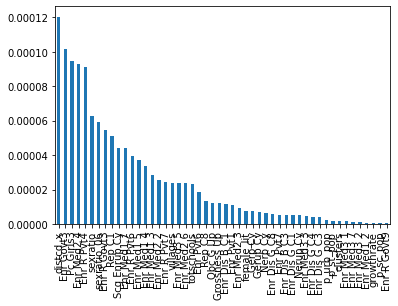

In [86]:
# To get the weights of all the variables
weights = pd.Series(clflr.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:50].plot(kind='bar'))

In [87]:
# Support Vector Machine
from sklearn.svm import SVC
clfsvc = SVC()
clfsvc.fit(X_train,y_train)
predsvc = clfsvc.predict(X_test)
results['SVM classifier'] = accuracy_score(y_test, predsvc)
accuracy_score(y_test, predsvc)

0.6561679790026247

In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predsvc)
cm

array([[129,   0,  39],
       [ 18,  24,  28],
       [ 35,  11,  97]])

In [113]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clfrf = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=10, max_features=20)
clfrf.fit(X_train,y_train)
predrf = clfrf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, predrf)
accuracy_score(y_test, predrf)

0.9212598425196851

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predrf)
cm

array([[156,   0,  12],
       [  0,  67,   3],
       [  7,   8, 128]])

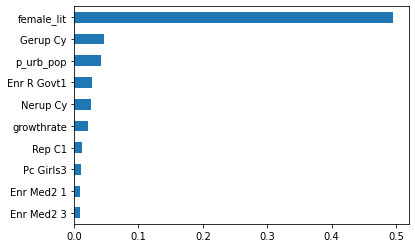

In [115]:
importances = clfrf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [116]:
# print(results)
for key, value in results.items():
  # print(key)
  print('{0}: {1}'.format(key,value))

KNN Classifier: 0.6824146981627297
Decision Tree: 0.889763779527559
SGD Classified: 0.5905511811023622
Logistic Regression: 0.6745406824146981
SVM classifier: 0.6561679790026247
Random Forest: 0.9212598425196851
